# Traffic Sign Recognotion Description Using CNN

### Loading Dataset & Preprocessing

In [59]:
import pandas as pd
import numpy as np
import os
import cv2

train_csv = 'C:/Users/hp/Traffic-dataset/Train.csv'
train_img_base = 'C:/Users/hp/Traffic-dataset' 


train_csv_df = pd.read_csv(train_csv)
print(train_csv_df.head())


train_csv_df['Path'] = train_csv_df['Path'].str.replace(r'^Train/', '', regex=True)

images = []
labels = []


for index, row in train_csv_df.iterrows():
    img_path = os.path.join(train_img_base, 'Train', row['Path'])  
    label = row['ClassId']

    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (32, 32))
        img = img / 255.0  
        images.append(img)
        labels.append(label)
    else:
        print(" Missing:", img_path)

# Convert to numpy arrays
X = np.array(images)
y = np.array(labels)

print("✅ Loaded images:", X.shape)
print("✅ Loaded labels:", y.shape)


   Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png  
✅ Loaded images: (39209, 32, 32, 3)
✅ Loaded labels: (39209,)


In [60]:
from tensorflow.keras.utils import to_categorical

y_cat = to_categorical(y, num_classes=43)
print("✅ y_cat shape:", y_cat.shape)


✅ y_cat shape: (39209, 43)


### Train Test Split

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train , y_val =train_test_split(X,y_cat,test_size=0.2 , random_state=42)




### Build CNN Model

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D , Dense , Dropout , Flatten

y = np.array(y).reshape(-1)

y_cat = to_categorical(y, num_classes=43)

num_classes = y_cat.shape[1]

model=Sequential([ Conv2D(32,(3,3) , activation='relu' , input_shape=(32,32,3)),
                  MaxPooling2D(2,2),
                  Conv2D(32,(3,3) , activation='relu'),
                  MaxPooling2D(2,2),
                  Conv2D(32,(3,3) , activation='relu'),
                  MaxPooling2D(2,2),
                  Flatten(),
                  Dense(128, activation='relu'),
                  Dropout(0.5),
                  Dense(num_classes, activation='softmax')
                 ])

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)              │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,451 (161.92 KB)

 Trainable params: 41,451 (161.92 KB)

 Non-trainable params: 0 (0.00 B)

### Training

In [67]:
model_history=model.fit(X_train, y_train ,epochs=10, validation_split=0.2)

Epoch 1/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7478 - loss: 1.1004 - val_accuracy: 0.9409 - val_loss: 0.2340
Epoch 2/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8848 - loss: 0.3698 - val_accuracy: 0.9431 - val_loss: 0.1887
Epoch 3/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.9143 - loss: 0.2760 - val_accuracy: 0.9664 - val_loss: 0.1171
Epoch 4/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9333 - loss: 0.2148 - val_accuracy: 0.9745 - val_loss: 0.0884
Epoch 5/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9458 - loss: 0.1823 - val_accuracy: 0.9756 - val_loss: 0.0801
Epoch 6/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9521 - loss: 0.1571 - val_accuracy: 0.9750 - val_loss: 0.0753
Epoch 7/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9583 - loss: 0.1353 - val_accuracy: 0.9794 - val_loss: 0.0699
Epoch 8/10
785/785 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9648 - loss: 0.1134 - 

### Evaluation

In [68]:
loss, accuracy = model.evaluate(X, y_cat)
print(f"Test Accuracy: {accuracy*100:.2f}%")


1226/1226 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9823 - loss: 0.0580
Test Accuracy: 98.87%


### Confusion Matrix

246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Accuracy Score : 0.9826574853353737 


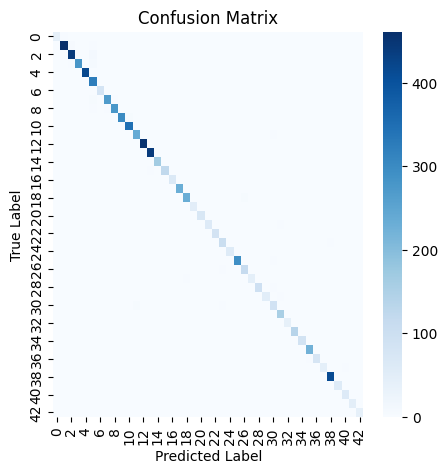

In [75]:
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob=model.predict(X_val)
y_pred=np.argmax(y_pred_prob,axis=1)
y_true=np.argmax(y_val , axis=1)

print(f'Accuracy Score : {accuracy_score(y_true,y_pred)} ')
cm=confusion_matrix(y_true,y_pred)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Print Sign Images  & Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


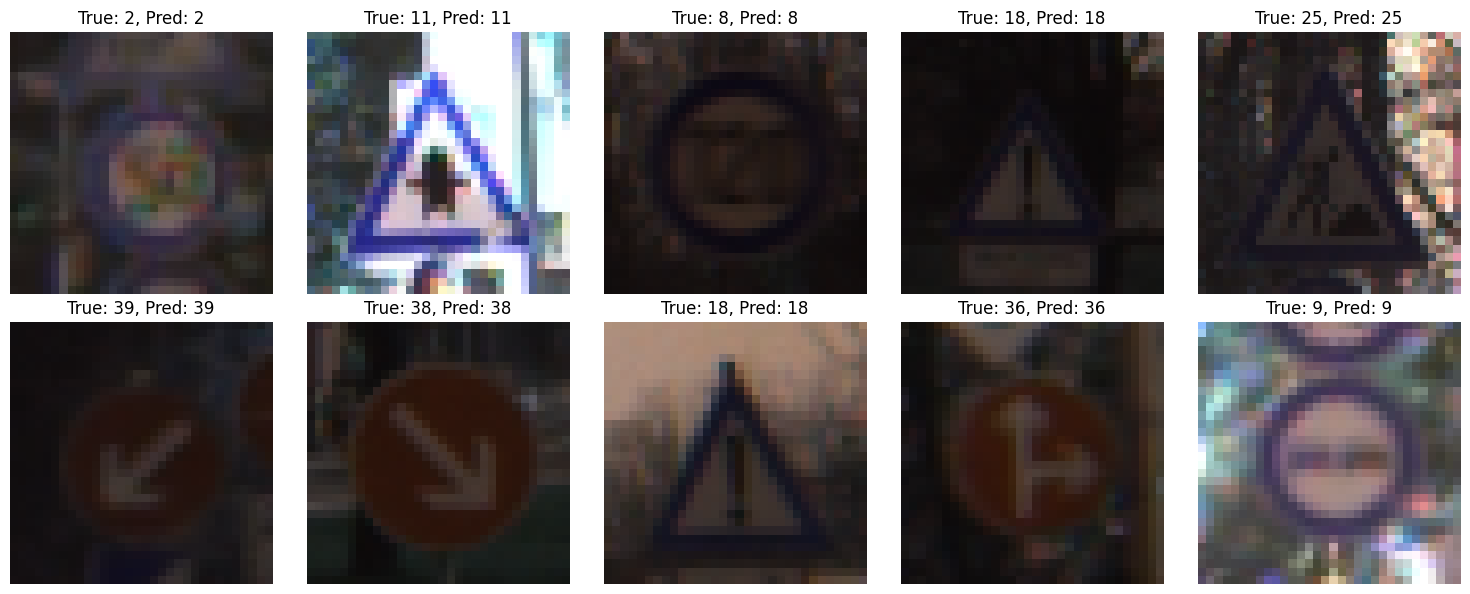

In [76]:

num_samples = 10
plt.figure(figsize=(15, 6))

for i in range(num_samples):
    index = np.random.randint(0, len(X_val))
    image = X_val[index]
    true_label = np.argmax(y_val[index])
    pred_label = np.argmax(model.predict(image.reshape(1, 32, 32, 3)))
    
    plt.subplot(2, 5, i+1)
    plt.imshow(image)
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()
